    label                                               text
0   fraud  hello, i m bank manager of SBI, ur debit card ...
1   fraud  Todays Vodafone numbers ending with 4882 are s...
2  normal               Please don't say like that. Hi hi hi
3  normal                                         Thank you!
4  normal  Oh that was a forwarded message. I thought you...
label
normal    5286
fraud      642
Name: count, dtype: int64


C:\Users\gadek\AppData\Local\Temp\ipykernel_5508\1309191813.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['label'].replace(["fraud","normal"],[1,0],inplace=True)
C:\Users\gadek\AppData\Local\Temp\ipykernel_5508\1309191813.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'].rep

ValueError: Expected 2D array, got 1D array instead:
array=[3908. 1738. 3776. ... 2537. 3436.  303.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

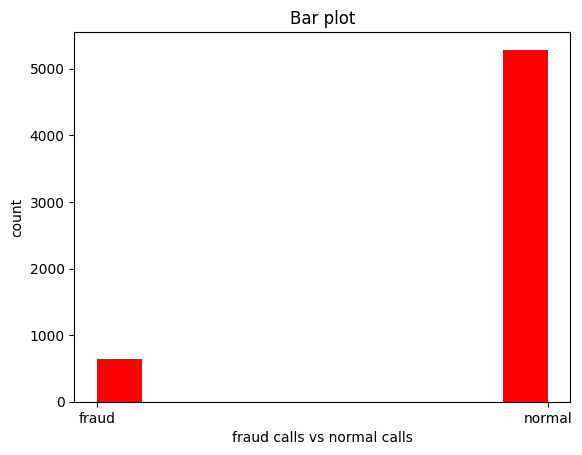

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


df = pd.read_csv("cleaned_dataset.csv")
print(df.head())
print(df['label'].value_counts())

import matplotlib.pyplot as plt

plt.hist(df['label'],color = 'r')
plt.title("Bar plot")
plt.xlabel("fraud calls vs normal calls")
plt.ylabel("count")

import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


df['label'].replace(["fraud","normal"],[1,0],inplace=True)
df.head(5)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
name = le.fit_transform(df['text'])
name

X = name
Y = df['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

model = LogisticRegression()
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)
print(X_test)
print(y_pred)

from sklearn import metrics
from sklearn.metrics import classification_report
print("Accuracy: ",metrics.accuracy_score(Y_test,y_pred))
print("Precision: ",metrics.precision_score(Y_test,y_pred,zero_division = 1))

In [2]:
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df['label'].replace(["fraud","normal"],[1,0],inplace=True)
df.head(5)

name = name.reshape(-1,1)

C:\Users\gadek\AppData\Local\Temp\ipykernel_5508\4174635763.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['label'].replace(["fraud","normal"],[1,0],inplace=True)
C:\Users\gadek\AppData\Local\Temp\ipykernel_5508\4174635763.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'].repla

label                                               text
0      1  hello, i m bank manager of SBI, ur debit card ...
1      1  Todays Vodafone numbers ending with 4882 are s...
2      0               Please don't say like that. Hi hi hi
3      0                                         Thank you!
4      0  Oh that was a forwarded message. I thought you...

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
name = le.fit_transform(df['text'])
name

array([5437, 4352, 3515, ..., 5541, 5542, 5431])

In [6]:
name = name.reshape(-1,1)

In [7]:
X = name
Y = df['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

model = LogisticRegression()
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)
print(X_test)
print(y_pred)

[[1362]
 [3388]
 [2659]
 ...
 [2820]
 [2376]
 [5231]]
[0 0 0 ... 0 0 0]


In [8]:
from sklearn import metrics
from sklearn.metrics import classification_report
print("Accuracy: ",metrics.accuracy_score(Y_test,y_pred))
print("Precision: ",metrics.precision_score(Y_test,y_pred,zero_division = 1))

Accuracy:  0.9055330634278003
Precision:  1.0


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

# Load dataset
df = pd.read_csv("cleaned_dataset.csv")

# Display first 5 rows
print(df.head())

# Count fraud vs normal calls
print(df['label'].value_counts())

# Plot fraud vs normal calls
plt.hist(df['label'], color='r')
plt.title("Fraud Calls vs Normal Calls")
plt.xlabel("Fraud (1) vs Normal (0)")
plt.ylabel("Count")
plt.show()

# Convert 'label' to binary (1 = Fraud, 0 = Normal)
df['label'].replace(["fraud", "normal"], [1, 0], inplace=True)

# **✅ Fix: Use TF-IDF Vectorizer for Text Processing**
vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Bi-grams
X = vectorizer.fit_transform(df['text'])  # Convert text into numerical features
Y = df['label']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Predictions
y_pred = model.predict(X_test)

# Print Accuracy Metrics
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))
print("Precision:", metrics.precision_score(Y_test, y_pred, zero_division=1))
print(metrics.classification_report(Y_test, y_pred))


    label                                               text
0   fraud  hello, i m bank manager of SBI, ur debit card ...
1   fraud  Todays Vodafone numbers ending with 4882 are s...
2  normal               Please don't say like that. Hi hi hi
3  normal                                         Thank you!
4  normal  Oh that was a forwarded message. I thought you...
label
normal    5286
fraud      642
Name: count, dtype: int64


C:\Users\gadek\AppData\Local\Temp\ipykernel_5508\1551976868.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['label'].replace(["fraud", "normal"], [1, 0], inplace=True)
C:\Users\gadek\AppData\Local\Temp\ipykernel_5508\1551976868.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label']

Accuracy: 0.9333895446880269
Precision: 1.0
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1050
           1       1.00      0.42      0.59       136

    accuracy                           0.93      1186
   macro avg       0.97      0.71      0.78      1186
weighted avg       0.94      0.93      0.92      1186

